<a href="https://colab.research.google.com/github/ambika1us/Cardiovascular_Risk_Prediction/blob/main/Ambika_Prasad_Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3><b>Project Name</b> - Cardiovascular Risk Prediction</h3>

<h5><b>Project Type : </b>Classification<br></h5>
<h5><b>Contribution : </b>Indivisual</h5>
<h5><b>Contributor : </b>Ambika Prasad Rath (ambika1us@gmail.com)</h5>

<h4><b>Project Summary - </b></h4>

<p>The main objective of this project is the prediction heart disease using different classification algorithms such as logistic regression, K-Nearest Neighbors, Support Vector Machine, Naive Bayesian algorithm, Decision Tree and Random forest classifier algorithms. The evaluation metrics used is confusion matrix and K-fold cross validation score.</p>
<h5>Methodology:</h5>
<ul>
<li>Import necessory libraries.</li>
<li>Import dataset, Read the dataset, the data should contain different variables like age, sex,cp,slop target.</li>
<li>Data Visualization using histogram distribution line and bar graph. Use of heatmap for determining the correlation of the various features with each other.</li>
<li>Data pre-processing: dummy variable trap for elimination of insignificant features from the dataset, spletting of the dataset into training and test sets feature scaling.</li>
<li>The machine learning models used for the risk prediction and classification of heart diseases are as follows:
<ol>
<li>Logistic Regression</li>
<li>Support Vector Machine</li>
<li>K-Nearest Neighbors</li>
<li>Naive Bayesian Algorithm</li>
<li>Decision Trees Classifier</li>
<li>Random Forest Classifier</li>
</ol></li>
<li>Evaluation of the performance and accuracy of the various ML models employed. Evaluation metrics consisted of:
<ol>
<li>confusion matrix</li>
<li>K-fold cross validation score</li> 
</ol>
</li>
<li>Plotting a bar graph for the comparison of the various test accuracies obtained by using the various ML classification algorithms.</li>
</ul>

<h5><b>Github Link:</b> https://github.com/ambika1us/Cardiovascular_Risk_Prediction</h5>

<h4><b>Problem Statement:</b></h4>
<p>The dataset is from an ongoing cardiovascular study on residents of the town of framingham, massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease. The dataset provides the patients information. It includes over 4000 records and 15 attributes variables. Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.</p>

<h4><b>Data Description:</b></h4>
<h5>Demographic:</h5>
<ul>
<li>Sex: Male or Female ("M" or "F")</li>
<li>Age: Age of the patient (continuous - although the recorded ages have been truncated to whole numbers, the concept of age is continuous)</li>
</ul>

<h5>Behavioral:</h5>
<ul>
<li>is_smoking: whether or not the patient is a current smoker ("YES" or "NO")</li>
<li>Cigs per Day: the number of cigarettes that the person smoked on average in one day (can be considered continuous as one can have any number of cigarettes, even half a cigarette.)</li>
</ul>
<h5>Medical (History):</h5>
<ul>
<li>BP Meds: whether or not the patient was on blood pressure medication (Nominal)</li>
<li>Prevalent stroke: whether or not the patient was hypertensive (Nominal)</li>
<li>Diabetes: whether or not the patient had diabetes (Nominal) medical (Current)</li>
<li>Tot Chol: Total cholesterol level (Continuous)</li>
<li>Sys BP: Systolic blood pressure (Continuous)</li>
<li>Dia BP: Diastolic blood pressure (Continuous)</li>
<li>BMI: Body mass index (Continuous)</li>
<li>Heart Rate: heart rate (Continuous - In medical research, variable such as heart rate through in fact discrete, yet are considered continuous because of large number of possible values)</li>
<li>Glucose: glucose level (Continuous) predict variable (desired target)</li>
<li>10-year risk of coronary heart disease CHD (binary: "1" means "Yes", "0" means "NO") DV</li>
</ul>

In [2]:
#Importing Libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve,plot_roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import xgboost as xgb
from sklearn import tree

from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn import ensemble
from collections import Counter

%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
crp_df=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone_Project_Classification/data_cardiovascular_risk.csv', index_col="id")

<h4><b>Data Preparation:</b></h4>

In [5]:
crp_df.head(1)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1


In [6]:
crp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 450.2+ KB


In [7]:
#Looking up for the detailed description of our dataset
crp_df.describe(include='all')

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


Checking min and max, all data points are in valid range.<br>
Now let's go ahead and check for the missing values in rest of the dataset.

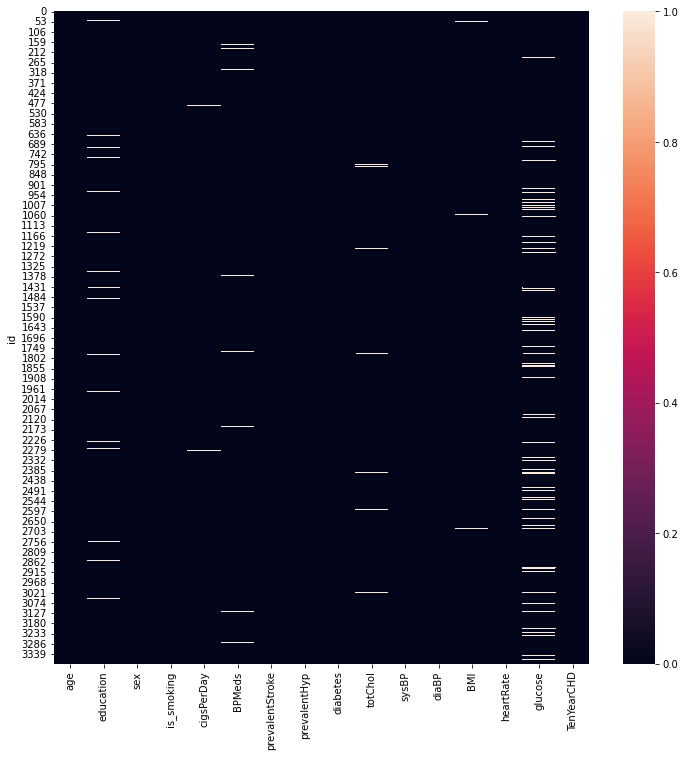

In [8]:
mis_val=crp_df.isnull()
plt.figure(figsize=(12,12))
sns.heatmap(mis_val)

In [9]:
#summing up the missing values
crp_df.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [10]:
crp_df.dropna(inplace=True)

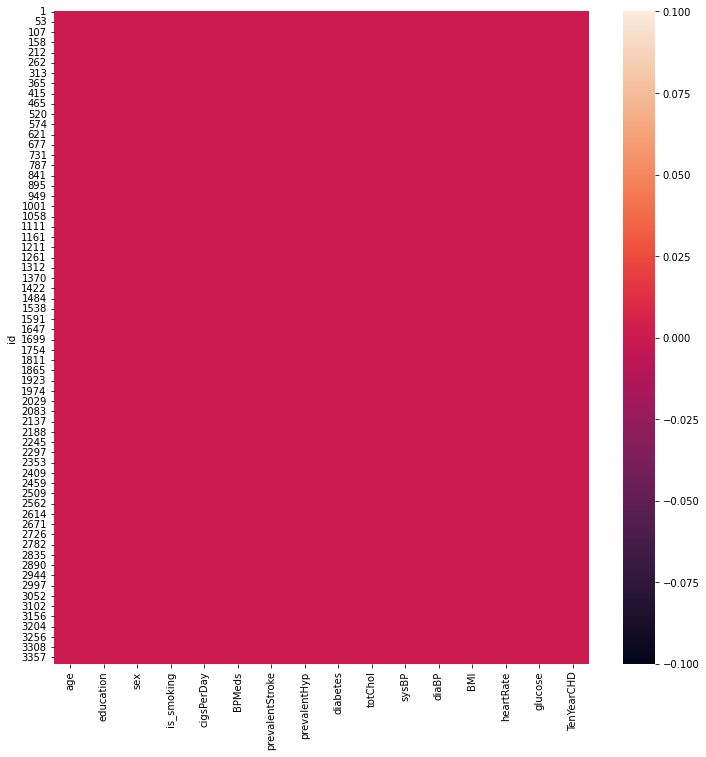

In [11]:
#Plotting the heatmap for missing values
mis_val=crp_df.isnull()
plt.figure(figsize=(12,12))
sns.heatmap(mis_val)

After treating the missing values, let's check the outliers

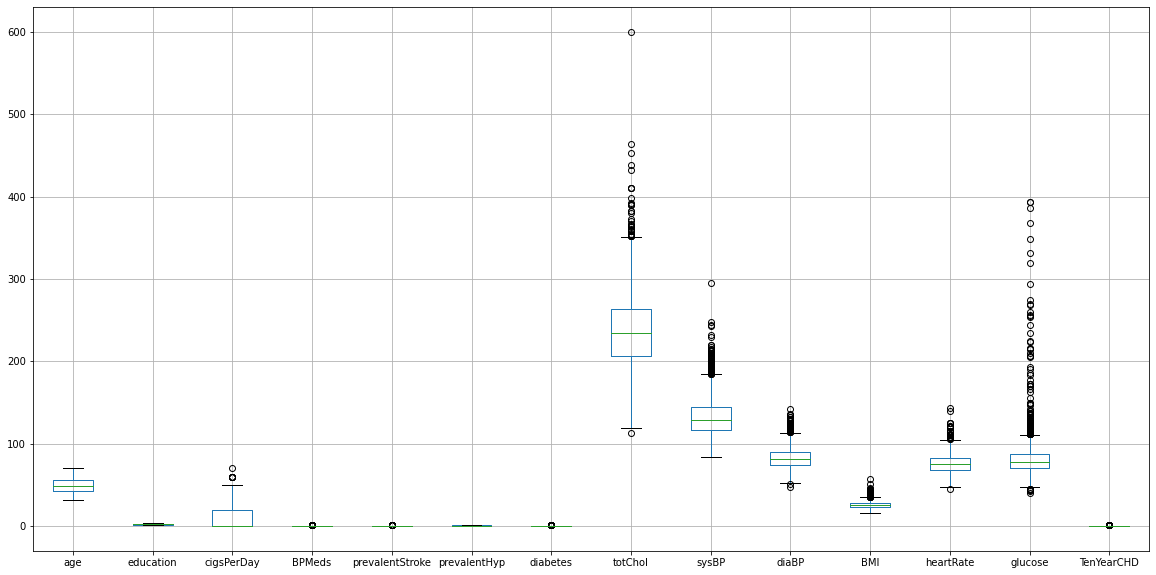

In [12]:
plt.figure(figsize=(20,10))
crp_df.boxplot()

There are outliers but within the possible range of values<br>
Let's check the correlation between each feature

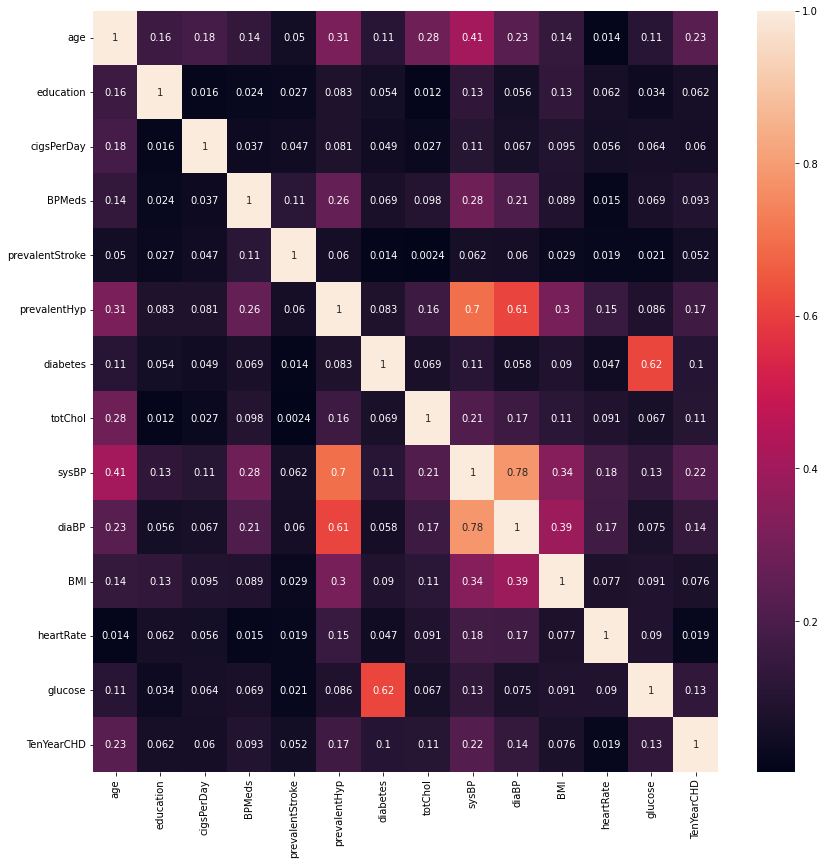

In [13]:
#Let's plot the correlation matrix using heatmap
plt.figure(figsize=(14,14))
correlation=crp_df.corr()
sns.heatmap(abs(correlation),annot=True)

There is no significant correlation between independent & dependent variable but there is a high correlation within independent variable.

<h4><b>Analysing the categorical features:</b></h4>
<h6><b>Which gender is prone to coronary heart disease?</b></h6>

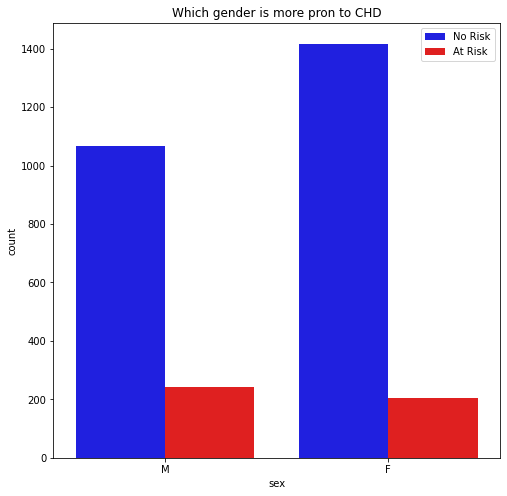

In [14]:
#10-year risk of coronary heart disease (binary: "1" means "Yes", "0" means "No")
pale={0:'blue',1:'red'}
plt.figure(figsize=(8,8))
sns.countplot(x=crp_df['sex'],hue=crp_df['TenYearCHD'],palette=pale)
plt.title("Which gender is more pron to CHD")
plt.legend(['No Risk','At Risk'])
plt.show()

<h6><b>Are diabetic patients at more risk of coronary heart disease?</b></h6>

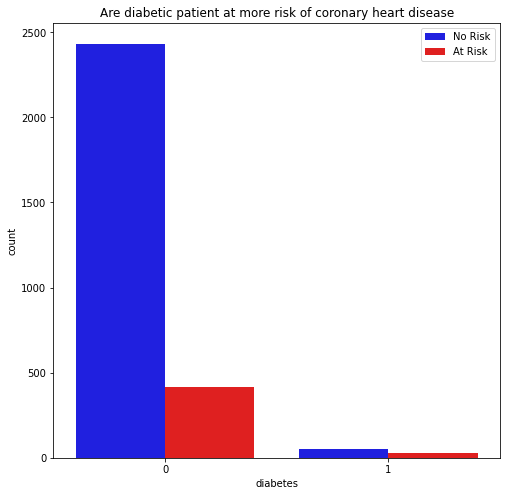

In [15]:
pale={0:'blue',1:'red'}
plt.figure(figsize=(8,8))
sns.countplot(x=crp_df['diabetes'],hue=crp_df['TenYearCHD'],palette=pale)
plt.title("Are diabetic patient at more risk of coronary heart disease")
plt.legend(['No Risk','At Risk'])
plt.show()

<h6><b>Are smokers at more risk of coronary heart desease?</b></h6>

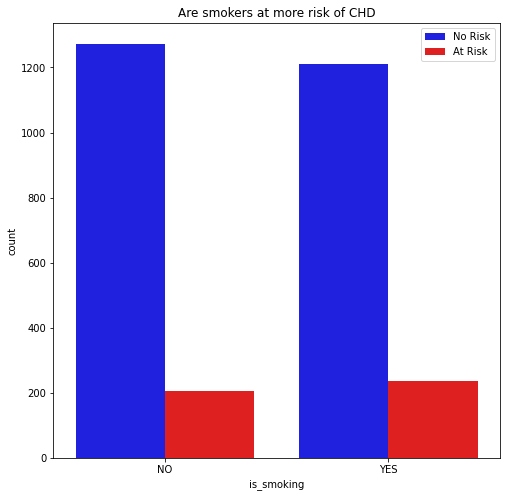

In [16]:
pale={0:'blue',1:'red'}
plt.figure(figsize=(8,8))
sns.countplot(x=crp_df['is_smoking'],hue=crp_df['TenYearCHD'],palette=pale)
plt.title('Are smokers at more risk of CHD')
plt.legend(['No Risk','At Risk'])
plt.show()

<h6><b>Are hypertensive patients at more risk of CHD?</b></h6>

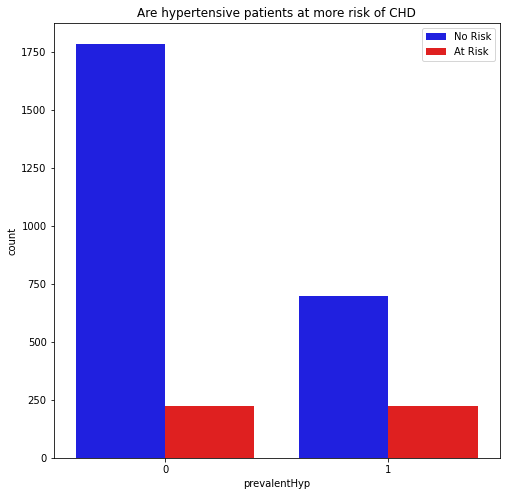

In [17]:
pale={0:'blue',1:'red'}
plt.figure(figsize=(8,8))
sns.countplot(x=crp_df['prevalentHyp'],hue=crp_df['TenYearCHD'],palette=pale)
plt.title('Are hypertensive patients at more risk of CHD')
plt.legend(['No Risk','At Risk'])
plt.show()

<h6><b>Are patients with blood pressure on medication at more risk of coronary heart disease?</b></h6>

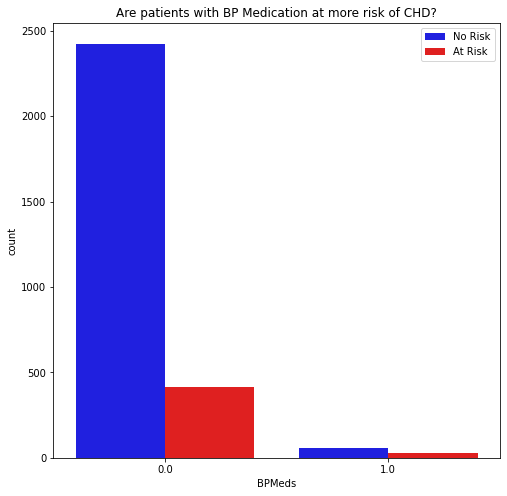

In [18]:
pale={0:'blue',1:'red'}
plt.figure(figsize=(8,8))
sns.countplot(x=crp_df['BPMeds'],hue=crp_df['TenYearCHD'],palette=pale)
plt.title('Are patients with BP Medication at more risk of CHD?')
plt.legend(['No Risk','At Risk'])
plt.show()

<h6><b>Which age group is more vulnerable to coronary heart disease?</b></h6>

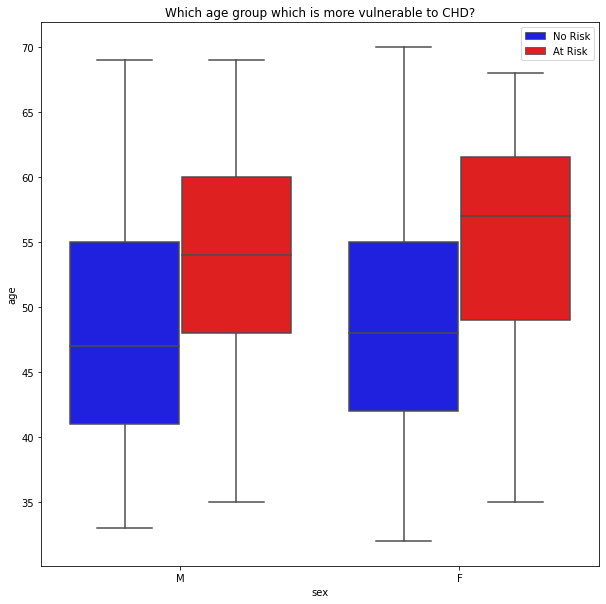

In [19]:
plt.figure(figsize=(10,10))
ax=sns.boxplot(x=crp_df['sex'],y=crp_df['age'],hue=crp_df['TenYearCHD'],palette=pale)
plt.title('Which age group which is more vulnerable to CHD?')
handles,_=ax.get_legend_handles_labels()
ax.legend(handles,['No Risk','At Risk'],loc="best")
plt.show()

<h6><b>Are total cholestrol levels related to coronary heart disease?</b></h6>

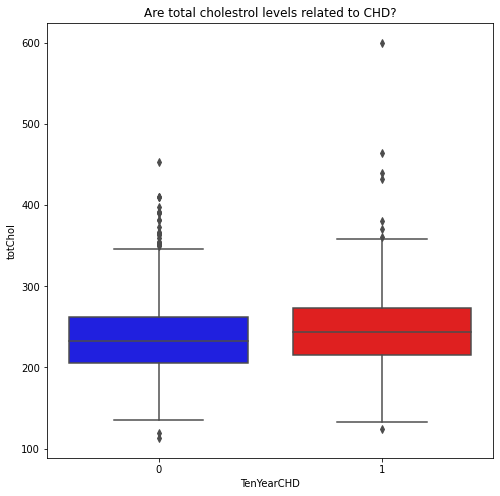

In [20]:
plt.figure(figsize=(8,8))
sns.boxplot(crp_df['TenYearCHD'],crp_df['totChol'],palette=pale)
plt.title('Are total cholestrol levels related to CHD?')
plt.show()

This indicates that cholestrol level is not the sole deciding factor for predicting whether the person gets CHD or not. People with similar levels of cholestrol have get CHD as well as are free from CHD. Clearly, there is no direct correlation of CHD with the cholestral level.

<h6><b>Is heart rate is responsible for CHD?</b></h6>

In [22]:
def heartRate_data(row):
  if row['heartRate']<=59:
    value='Low'
  elif row['heartRate']<100:
    value='Normal'
  else:
    value='High'
  return value

In [23]:
crp_df['heartRateLabel']=crp_df.apply(heartRate_data,axis=1)

In [24]:
crp_df['heartRateLabel'].value_counts

<bound method IndexOpsMixin.value_counts of id
1       Normal
2       Normal
3       Normal
4       Normal
5       Normal
         ...  
3384      High
3385    Normal
3386    Normal
3387    Normal
3389    Normal
Name: heartRateLabel, Length: 2927, dtype: object>

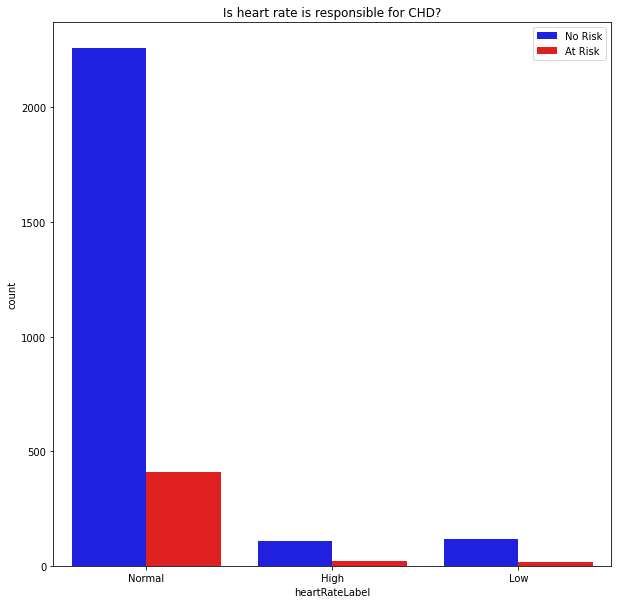

In [25]:
plt.figure(figsize=(10,10))
sns.countplot(x=crp_df['heartRateLabel'],hue=crp_df['TenYearCHD'],palette=pale)
plt.title('Is heart rate is responsible for CHD?')
plt.legend(['No Risk','At Risk'])
plt.show()